In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
rent_db = pd.read_csv('one_bed_rents_CO.csv', encoding='latin-1') 

In [3]:
rent_db.head()

,SubCount,cbsadescSubmarketNeighborhood,cbsadesc,Submarket,Neighborhood,propertyID,year_built,avg_size,avg_rent,submarket_avg_rent,building_age,has_dishwasher,has_gym,has_pool,has_wd_inunit
0,105,"Denver-Aurora-Lakewood, CODowntown Denver","Denver-Aurora-Lakewood, CO",Downtown Denver,Alamo Placita,9463666,2016,814,1823,1720.87619,3,0,1,0,1
1,105,"Denver-Aurora-Lakewood, CODowntown Denver","Denver-Aurora-Lakewood, CO",Downtown Denver,Baker,4190514,1964,473,1301,1720.87619,55,0,1,0,0
2,105,"Denver-Aurora-Lakewood, CODowntown Denver","Denver-Aurora-Lakewood, CO",Downtown Denver,Ballpark,739857,2003,778,1653,1720.87619,16,1,1,0,1
3,105,"Denver-Aurora-Lakewood, CODowntown Denver","Denver-Aurora-Lakewood, CO",Downtown Denver,Ballpark,4675198,2002,795,1622,1720.87619,17,1,1,0,1
4,105,"Denver-Aurora-Lakewood, CODowntown Denver","Denver-Aurora-Lakewood, CO",Downtown Denver,Ballpark,7011341,1927,888,1901,1720.87619,92,1,1,0,1


In [16]:
rent_db2 = rent_db[['avg_size','avg_rent','submarket_avg_rent','building_age','has_dishwasher','has_gym','has_pool','has_wd_inunit']]

In [17]:
rent_db2.head()

,avg_size,avg_rent,submarket_avg_rent,building_age,has_dishwasher,has_gym,has_pool,has_wd_inunit
0,814,1823,1720.87619,3,0,1,0,1
1,473,1301,1720.87619,55,0,1,0,0
2,778,1653,1720.87619,16,1,1,0,1
3,795,1622,1720.87619,17,1,1,0,1
4,888,1901,1720.87619,92,1,1,0,1


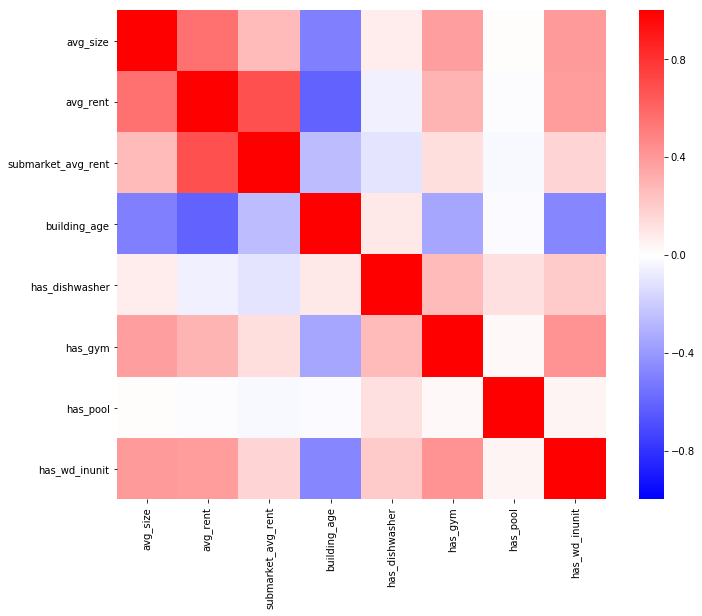

In [18]:
corrmat = rent_db2.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap = 'bwr')
plt.show()

#went back and removed propertyID from this, this is basically index dont think I need

In [19]:
print(corrmat)

                    avg_size  avg_rent  submarket_avg_rent  building_age  \
avg_size            1.000000  0.559755            0.268122     -0.495238   
avg_rent            0.559755  1.000000            0.683179     -0.611809   
submarket_avg_rent  0.268122  0.683179            1.000000     -0.263855   
building_age       -0.495238 -0.611809           -0.263855      1.000000   
has_dishwasher      0.073449 -0.055759           -0.108850      0.088052   
has_gym             0.378633  0.294334            0.128607     -0.350130   
has_pool            0.011061 -0.015255           -0.027303     -0.021101   
has_wd_inunit       0.395579  0.390222            0.168187     -0.468771   

                    has_dishwasher   has_gym  has_pool  has_wd_inunit  
avg_size                  0.073449  0.378633  0.011061       0.395579  
avg_rent                 -0.055759  0.294334 -0.015255       0.390222  
submarket_avg_rent       -0.108850  0.128607 -0.027303       0.168187  
building_age              0

In [22]:
#two issues here. looking at rents vs the submarket average is better than rents.
#also, rents and size are not surprisingly correlated, can look at rent/SF to get around this
#although don't have submarket rent/SF data in this dataset

rent_db2['Rent/SF'] = rent_db2['avg_rent']/rent_db2['avg_size']

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [23]:
rent_db2.head()

,avg_size,avg_rent,submarket_avg_rent,building_age,has_dishwasher,has_gym,has_pool,has_wd_inunit,Rent/SF
0,814,1823,1720.87619,3,0,1,0,1,2.239558
1,473,1301,1720.87619,55,0,1,0,0,2.750529
2,778,1653,1720.87619,16,1,1,0,1,2.124679
3,795,1622,1720.87619,17,1,1,0,1,2.040252
4,888,1901,1720.87619,92,1,1,0,1,2.140766


In [27]:
corrmat2 = rent_db2.corr()

In [28]:
corrmat2

,avg_size,avg_rent,submarket_avg_rent,building_age,has_dishwasher,has_gym,has_pool,has_wd_inunit,Rent/SF
avg_size,1.000000,0.559755,0.268122,-0.495238,0.073449,0.378633,0.011061,0.395579,-0.028345
avg_rent,0.559755,1.000000,0.683179,-0.611809,-0.055759,0.294334,-0.015255,0.390222,0.794741
submarket_avg_rent,0.268122,0.683179,1.000000,-0.263855,-0.108850,0.128607,-0.027303,0.168187,0.648298
building_age,-0.495238,-0.611809,-0.263855,1.000000,0.088052,-0.350130,-0.021101,-0.468771,-0.367692
has_dishwasher,0.073449,-0.055759,-0.108850,0.088052,1.000000,0.268027,0.118411,0.206394,-0.117917
has_gym,0.378633,0.294334,0.128607,-0.350130,0.268027,1.000000,0.026481,0.422227,0.085442
has_pool,0.011061,-0.015255,-0.027303,-0.021101,0.118411,0.026481,1.000000,0.046627,-0.027412
has_wd_inunit,0.395579,0.390222,0.168187,-0.468771,0.206394,0.422227,0.046627,1.000000,0.191391
Rent/SF,-0.028345,0.794741,0.648298,-0.367692,-0.117917,0.085442,-0.027412,0.191391,1.000000


In [29]:
#add rent premium to submarket
rent_db2['prem_to_sub'] = rent_db2['avg_rent'] - rent_db2['submarket_avg_rent']

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
rent_db2.head()

,avg_size,avg_rent,submarket_avg_rent,building_age,has_dishwasher,has_gym,has_pool,has_wd_inunit,Rent/SF,prem_to_sub
0,814,1823,1720.87619,3,0,1,0,1,2.239558,102.12381
1,473,1301,1720.87619,55,0,1,0,0,2.750529,-419.87619
2,778,1653,1720.87619,16,1,1,0,1,2.124679,-67.87619
3,795,1622,1720.87619,17,1,1,0,1,2.040252,-98.87619
4,888,1901,1720.87619,92,1,1,0,1,2.140766,180.12381


In [31]:
corrmat3 = rent_db2.corr()

In [32]:
corrmat3
#how do I get last to display as decimal

,avg_size,avg_rent,submarket_avg_rent,building_age,has_dishwasher,has_gym,has_pool,has_wd_inunit,Rent/SF,prem_to_sub
avg_size,1.000000,0.559755,2.681224e-01,-0.495238,0.073449,0.378633,0.011061,0.395579,-0.028345,5.156851e-01
avg_rent,0.559755,1.000000,6.831793e-01,-0.611809,-0.055759,0.294334,-0.015255,0.390222,0.794741,7.302507e-01
submarket_avg_rent,0.268122,0.683179,1.000000e+00,-0.263855,-0.108850,0.128607,-0.027303,0.168187,0.648298,1.641085e-10
building_age,-0.495238,-0.611809,-2.638548e-01,1.000000,0.088052,-0.350130,-0.021101,-0.468771,-0.367692,-5.909605e-01
has_dishwasher,0.073449,-0.055759,-1.088497e-01,0.088052,1.000000,0.268027,0.118411,0.206394,-0.117917,2.547674e-02
has_gym,0.378633,0.294334,1.286070e-01,-0.350130,0.268027,1.000000,0.026481,0.422227,0.085442,2.827417e-01
has_pool,0.011061,-0.015255,-2.730276e-02,-0.021101,0.118411,0.026481,1.000000,0.046627,-0.027412,4.652273e-03
has_wd_inunit,0.395579,0.390222,1.681868e-01,-0.468771,0.206394,0.422227,0.046627,1.000000,0.191391,3.770214e-01
Rent/SF,-0.028345,0.794741,6.482978e-01,-0.367692,-0.117917,0.085442,-0.027412,0.191391,1.000000,4.818039e-01
prem_to_sub,0.515685,0.730251,1.641085e-10,-0.590961,0.025477,0.282742,0.004652,0.377021,0.481804,1.000000e+00


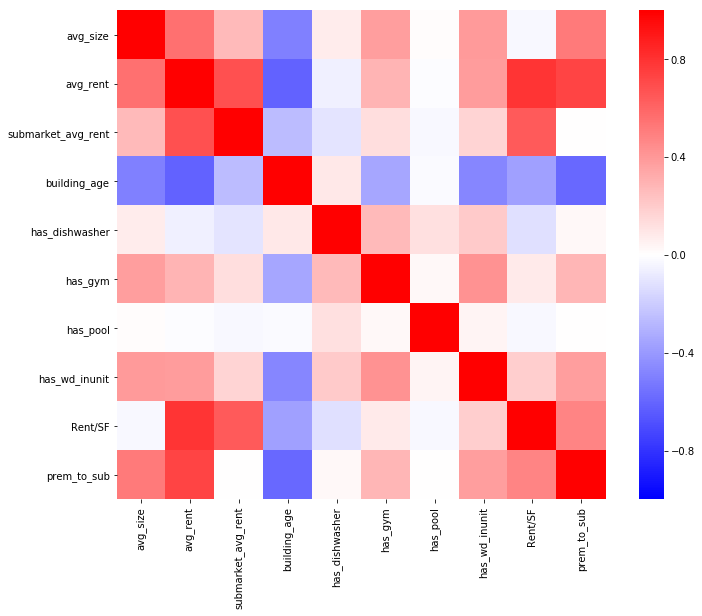

In [33]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat3, vmax=1, vmin=-1, square=True, cmap = 'bwr')
plt.show()


In [35]:
print(corrmat3)

                    avg_size  avg_rent  submarket_avg_rent  building_age  \
avg_size            1.000000  0.559755        2.681224e-01     -0.495238   
avg_rent            0.559755  1.000000        6.831793e-01     -0.611809   
submarket_avg_rent  0.268122  0.683179        1.000000e+00     -0.263855   
building_age       -0.495238 -0.611809       -2.638548e-01      1.000000   
has_dishwasher      0.073449 -0.055759       -1.088497e-01      0.088052   
has_gym             0.378633  0.294334        1.286070e-01     -0.350130   
has_pool            0.011061 -0.015255       -2.730276e-02     -0.021101   
has_wd_inunit       0.395579  0.390222        1.681868e-01     -0.468771   
Rent/SF            -0.028345  0.794741        6.482978e-01     -0.367692   
prem_to_sub         0.515685  0.730251        1.641085e-10     -0.590961   

                    has_dishwasher   has_gym  has_pool  has_wd_inunit  \
avg_size                  0.073449  0.378633  0.011061       0.395579   
avg_rent         

In [40]:
rent_db_final = rent_db2[['prem_to_sub','avg_size','has_wd_inunit','has_gym','building_age']].dropna()
rent_db_final.head()

,prem_to_sub,avg_size,has_wd_inunit,has_gym,building_age
0,102.12381,814,1,1,3
1,-419.87619,473,0,1,55
2,-67.87619,778,1,1,16
3,-98.87619,795,1,1,17
4,180.12381,888,1,1,92


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [41]:
X=StandardScaler().fit_transform(rent_db_final)

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
print(X)

[[ 0.41974618  0.9359313   0.85248617  0.57911587 -1.20181467]
 [-1.72576237 -2.1571961  -1.17303956  0.57911587  1.42711506]
 [-0.27898266  0.60938413  0.85248617  0.57911587 -0.54458224]
 ...
 [-0.72667799 -1.00521023  0.85248617  0.57911587 -1.20181467]
 [-0.31566103  0.70009168 -1.17303956  0.57911587 -1.25237101]
 [ 0.52281358  0.26469544  0.85248617  0.57911587 -1.25237101]]


In [46]:
sklearn_pca = PCA(n_components=5)
Y_Sklearn = sklearn_pca.fit_transform(X)

In [47]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.54469664 0.16074206 0.11787873 0.09838072 0.07830185]
